### Modelo poblacional dP/dt = 0.0004 P^2 - 0.06 P

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ejercicio1 import plot_vector_field

In [2]:

a = 0.0004  # 1/(individuo·semana)
b = 0.06    # 1/semana

# dP/dt = g(P) = a P^2 - b P = P (a P - b)
def g(P):
    return a*P**2 - b*P

# (t, P): F(t, P) = (1, g(P))
def f_field(t, P):
    return g(P)

# g'(P) = 2aP - b
def equilibria_and_stability():
    eq = [0.0, b/a]  # P* = 0, P* = b/a
    stab = []
    for Pstar in eq:
        gp = 2*a*Pstar - b
        if gp < 0:
            stab.append('estable (atractor)')
        elif gp > 0:
            stab.append('inestable (repulsor)')
        else:
            stab.append('semiesTABLE (no lineal)')
    return list(zip(eq, stab))

# Solución analítica:
def P_solution(t, P0):
    K = a - b/float(P0)
    denom = a - K*np.exp(b*t)
    return b / denom

# Tiempo de explosión:
def blowup_time(P0):
    K = a - b/float(P0)
    if K <= 0:
        return np.inf
    return (1.0/b)*np.log(a/K)

In [4]:

print("Dimensiones")
print("a = 0.0004 -> 1 / (individuo·semana)")
print("b = 0.06   -> 1 / semana")

print("\nEquilibrios y estabilidad")
for Pstar, s in equilibria_and_stability():
    print(f"P* = {Pstar:.3f} -> {s}")


Dimensiones
a = 0.0004 -> 1 / (individuo·semana)
b = 0.06   -> 1 / semana

Equilibrios y estabilidad
P* = 0.000 -> estable (atractor)
P* = 150.000 -> inestable (repulsor)


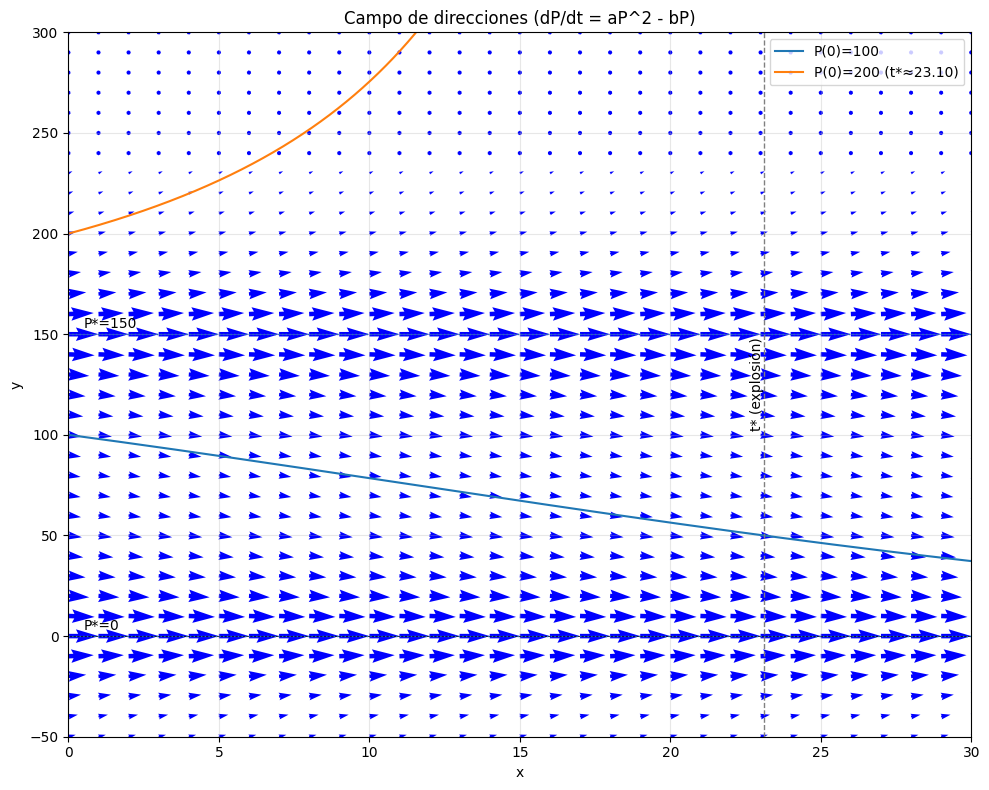

In [5]:
# Campo + soluciones para P0 = 200 y P0 = 100 
tmin, tmax = 0.0, 30.0
Pmin, Pmax = -50.0, 300.0

# Campo de direcciones
fig1 = plot_vector_field(
    f=lambda T, P: f_field(T, P),
    xmin=tmin, xmax=tmax, ymin=Pmin, ymax=Pmax,
    xstep=1.0, ystep=10.0,
    field_type='N', streamlines=False, density=1.0
)
ax1 = plt.gca()
ax1.set_title("Campo de direcciones (dP/dt = aP^2 - bP)")

# Soluciones analíticas
t = np.linspace(tmin, tmax, 2000)

# P0 = 100 (no explota tiende a 0+)
P0_1 = 100.0
P_100 = P_solution(t, P0_1)
ax1.plot(t, P_100, label=f"P(0)={P0_1:.0f}")

# P0 = 200 (explosión finita)
P0_2 = 200.0
t_star = blowup_time(P0_2)
if np.isfinite(t_star):
    t2 = np.linspace(tmin, min(tmax, t_star - 1e-3), 2000)
    P_200 = P_solution(t2, P0_2)
    ax1.plot(t2, P_200, label=f"P(0)={P0_2:.0f} (t*≈{t_star:.2f})")
    ax1.axvline(t_star, ls="--", lw=1, color="gray")
    ax1.text(t_star, 0.5*(Pmin+Pmax), "t* (explosión)", rotation=90, va="center", ha="right")
else:
    P_200 = P_solution(t, P0_2)
    ax1.plot(t, P_200, label=f"P(0)={P0_2:.0f}")

# Marcar equilibrios
eq_vals = [0.0, b/a]
for vv in eq_vals:
    ax1.hlines(vv, tmin, tmax, linestyles=':', linewidth=1)
    ax1.text(tmin+0.5, vv+3, f"P*={vv:.0f}")

ax1.legend()
plt.tight_layout()
plt.show()
